# Thư viện

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
import imgaug.augmenters as iaa
from qtdm import qtdm


# Tìm hiểu dữ liệu

In [ ]:
def count_data_move(folder):
    for brain in ['axial_t1wce_2_class', 'coronal_t1wce_2_class', 'sagittal_t1wce_2_class']:
        for images_labels in ['images', 'labels']:
            for train_test in ['train', 'test']:
                subfolder = os.path.join(folder, brain, images_labels, train_test)
                num_files = len(os.listdir(subfolder))
                print(f'Number of files in {images_labels}/{train_test}: {num_files}')

count_data_move('/kaggle/input/brain-tumor-object-detection-datasets')


Number of files in images/train: 310
Number of files in images/test: 75
Number of files in labels/train: 296
Number of files in labels/test: 75
Number of files in images/train: 319
Number of files in images/test: 78
Number of files in labels/train: 318
Number of files in labels/test: 78
Number of files in images/train: 264
Number of files in images/test: 70
Number of files in labels/train: 264
Number of files in labels/test: 70


In [ ]:
# Define the path to the label folder
label_dir = "/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/train"

# List all files in the label folder
label_files = sorted(os.listdir(label_dir))

# Initialize counters
positive_count = 0
negative_count = 0

# Iterate over label files and count positive and negative labels
for label_file in label_files:
    with open(os.path.join(label_dir, label_file), 'r') as f:
        line = f.readline().strip().split()
        class_id = int(line[0])
        if class_id == 1:
            positive_count += 1
        elif class_id == 0:
            negative_count += 1

# Print the counts
print("Number of positive labels:", positive_count)
print("Number of negative labels:", negative_count)


Number of positive labels: 153
Number of negative labels: 165


In [ ]:
# Define augmentation method
augmentation = iaa.Sequential([
    iaa.Affine(rotate=(-10, 10), scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})
])

# Define directories
image_dir_before = "/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/images/train"
image_dir_after = "/kaggle/working/augmented_images2"

# Clear the existing content in the output directory
if os.path.exists(image_dir_after):
    shutil.rmtree(image_dir_after)
os.makedirs(image_dir_after)

# Count the number of images before augmentation
num_images_before = len(os.listdir(image_dir_before))

# Augment images and save them to the output directory
for filename in os.listdir(image_dir_before):
    image_path = os.path.join(image_dir_before, filename)
    image = cv2.imread(image_path)
    image_aug = augmentation(image=image)
    output_path = os.path.join(image_dir_after, filename)
    cv2.imwrite(output_path, image_aug)

# Count the number of images after augmentation
num_images_after = len(os.listdir(image_dir_after))

# Print the counts
print("Number of images before augmentation:", num_images_before)
print("Number of images after augmentation:", num_images_after)


Number of images before augmentation: 319
Number of images after augmentation: 319


In [ ]:
# Function to parse label file
def parse_label(label_file):
    with open(label_file, 'r') as f:
        line = f.readline().strip().split()
        class_id = int(line[0])
        x, y, w, h = map(float, line[1:])
        return class_id, x, y, w, h

# Define augmentation method
augmentation = iaa.Sequential([
    iaa.Affine(rotate=(-10, 10), scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})
])

# Define directories
image_dir_before = "/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/images/train"
label_dir_before = "/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/train"
image_dir_after = "/kaggle/working/augmented_images"
label_dir_after = "/kaggle/working/augmented_labels"

# Clear the existing content in the output directories
if os.path.exists(image_dir_after):
    shutil.rmtree(image_dir_after)
os.makedirs(image_dir_after)

if os.path.exists(label_dir_after):
    shutil.rmtree(label_dir_after)
os.makedirs(label_dir_after)

# Augment images and save them to the output directory
for filename in os.listdir(image_dir_before):
    # Augment image
    image_path_before = os.path.join(image_dir_before, filename)
    image_path_after = os.path.join(image_dir_after, filename)
    image = cv2.imread(image_path_before)
    image_aug = augmentation(image=image)
    cv2.imwrite(image_path_after, image_aug)

    # Copy label file
    label_path_before = os.path.join(label_dir_before, filename.replace('.jpg', '.txt'))
    label_path_after = os.path.join(label_dir_after, filename.replace('.jpg', '.txt'))
    try:
        shutil.copyfile(label_path_before, label_path_after)
    except FileNotFoundError:
        print(f"Label file '{label_path_before}' not found. Skipping...")

# Count the number of images before and after augmentation
num_images_before = len(os.listdir(image_dir_before))
num_images_after = len(os.listdir(image_dir_after))

# Print the counts
print("Number of images before augmentation:", num_images_before)
print("Number of images after augmentation:", num_images_after)


Label file '/kaggle/input/brain-tumor-object-detection-datasets/coronal_t1wce_2_class/labels/train/72 (12).txt' not found. Skipping...
Number of images before augmentation: 319
Number of images after augmentation: 319


In [ ]:
import cv2
import numpy as np
import os
import shutil

data_folder = "/kaggle/input/brain-tumor-object-detection-datasets"
output_folder = 'braintumors'
data_folder_yolo = output_folder + "_yolo"
data_folder_coco = output_folder + "_coco"
folders = os.listdir(data_folder)
print(folders)

['coronal_t1wce_2_class', 'axial_t1wce_2_class', 'sagittal_t1wce_2_class']


In [ ]:
from glob import glob
def count_yolo_data(folder):
    for images_labels in ['images', 'labels']:
        for train_test in ['train', 'test']:
            file_ext = '*.jpg' if images_labels == 'images' else '*.txt'
            p = os.path.join(folder, images_labels, train_test, file_ext)
            files = glob(p)
            print(train_test, images_labels, len(files))

In [ ]:
for folder in folders:
    print('-'*8 + folder + '-'*8)
    folder = os.path.join(data_folder, folder)
    count_yolo_data(folder)

--------coronal_t1wce_2_class--------
train images 319
test images 78
train labels 318
test labels 78
--------axial_t1wce_2_class--------
train images 310
test images 75
train labels 296
test labels 75
--------sagittal_t1wce_2_class--------
train images 264
test images 70
train labels 264
test labels 70


In [ ]:
import shutil
from tqdm import tqdm
# move all into one folder
def copy_yolo_files(from_folder, to_folder, images_labels, train_test):
    from_path = os.path.join(from_folder, images_labels, train_test)
    to_path = os.path.join(to_folder, images_labels, train_test)
    os.makedirs(to_path, exist_ok = True)

    # Get the list of all label files in the labels directory for the given train/test split
    label_from_path = os.path.join(from_folder, "labels", train_test)
    label_files = glob(os.path.join(label_from_path, "*.txt"))
    label_file_names = [os.path.basename(f) for f in label_files]

    # Get the list of all image files in the images directory for the given train/test split
    file_ext = "*.jpg" if images_labels == "images" else "*.txt"
    files = glob(os.path.join(from_path, file_ext))

    # Move files that have a corresponding label file
    for file in tqdm(files):
        file_name = os.path.basename(file)
        if file_name.split('.')[0] + '.txt' in label_file_names:
            shutil.copy(file, to_path)

In [ ]:
# copy
import matplotlib.pyplot as plt
for from_folder in folders:
    from_folder = os.path.join(data_folder, from_folder)
    to_folder = data_folder_yolo
    for images_labels in ['images', 'labels']:
        for train_test in ['train', 'test']:
            copy_yolo_files(from_folder, to_folder, images_labels, train_test)

100%|██████████| 70/70 [00:00<00:00, 185.03it/s]


In [ ]:
def count_data_move(folder):
    for images_labels in ['images', 'labels']:
        for train_test in ['train', 'test']:
            subfolder = os.path.join(folder, images_labels, train_test)
            num_files = len(os.listdir(subfolder))
            print(f'Number of files in {images_labels}/{train_test}: {num_files}')

count_data_move('braintumors_yolo')

Number of files in images/train: 878
Number of files in images/test: 223
Number of files in labels/train: 878
Number of files in labels/test: 223


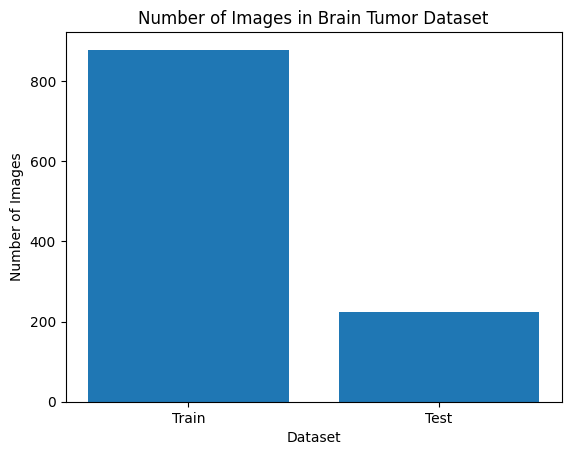

In [ ]:
train_data_dir = os.path.join('/kaggle/working/braintumors_yolo', 'images', 'train')
test_data_dir = os.path.join('/kaggle/working/braintumors_yolo', 'images', 'test')

# Get a list of all the image files in the training and test data directories.
train_image_files = glob(os.path.join(train_data_dir, '*.jpg'))
test_image_files = glob(os.path.join(test_data_dir, '*.jpg'))

# Count the number of image files in the training and test data directories.
num_train_images = len(train_image_files)
num_test_images = len(test_image_files)

# Plot the number of training and test images.
plt.bar(['Train', 'Test'], [num_train_images, num_test_images])
plt.title('Number of Images in Brain Tumor Dataset')
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.show()

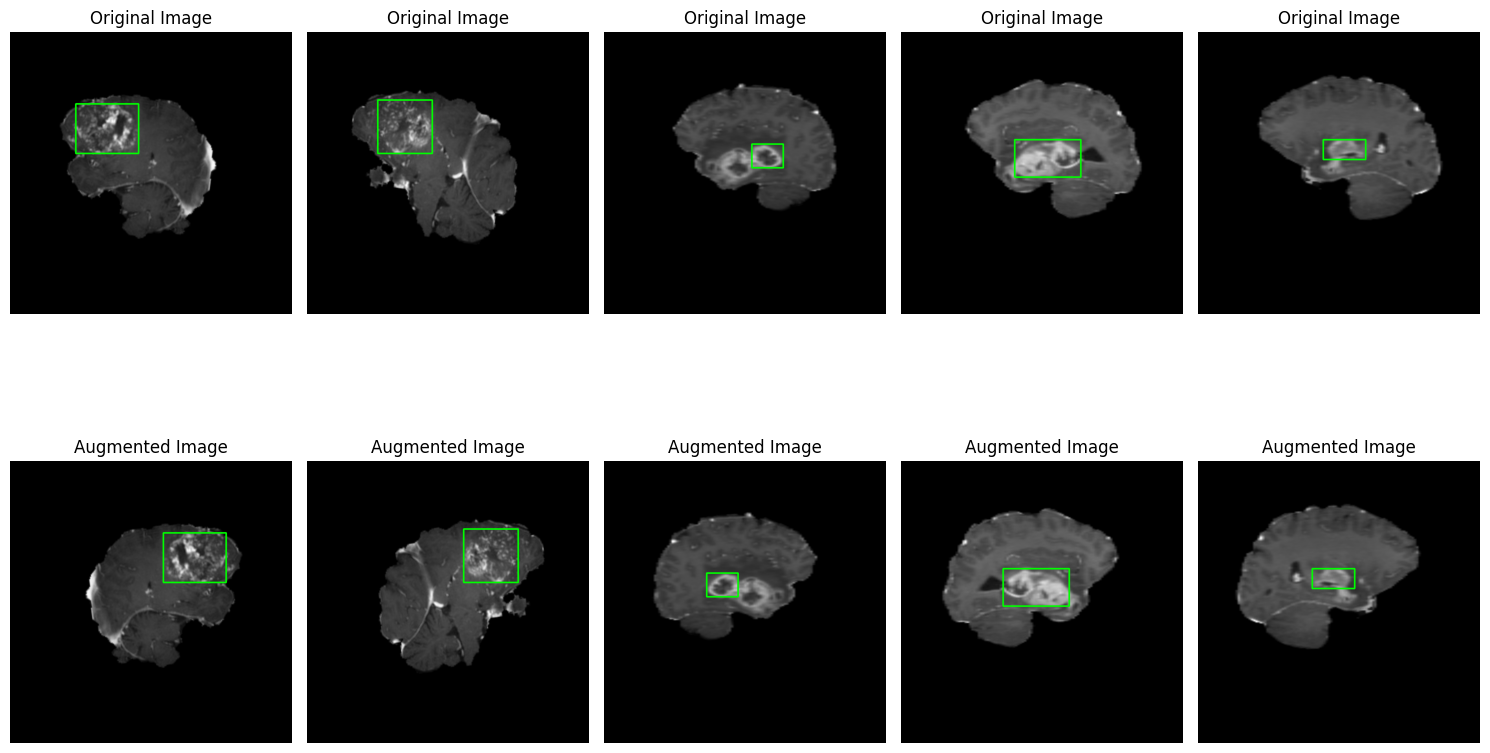

In [ ]:
# Define the directories containing the merged images and labels
base_root = "/kaggle/working/braintumors_yolo"
image_pairs = []

# Function to parse label file
def parse_label(label_file):
    with open(label_file, 'r') as f:
        line = f.readline().strip().split()
        class_id = int(line[0])
        x, y, w, h = map(float, line[1:])
        return class_id, x, y, w, h

# Function to draw bounding box on image
def draw_bbox(image, bbox, color=(0, 255, 0), thickness=2):
    x, y, w, h = bbox
    # Convert to pixel coordinates
    img_h, img_w, _ = image.shape
    x1 = int((x - w / 2) * img_w)
    y1 = int((y - h / 2) * img_h)
    x2 = int((x + w / 2) * img_w)
    y2 = int((y + h / 2) * img_h)
    # Draw rectangle on a copy of the image
    image_with_bbox = image.copy()
    cv2.rectangle(image_with_bbox, (x1, y1), (x2, y2), color, thickness)
    return image_with_bbox

# Function to augment image and bounding box
def augment_image(image, bbox):
    # Example augmentation (you can use more complex techniques)
    # Here, just flipping the image horizontally
    augmented_image = np.fliplr(image)
    # Create a copy of bbox to avoid modifying the original bbox
    augmented_bbox = bbox.copy()
    # Adjust bounding box accordingly for horizontal flip
    augmented_bbox[0] = 1 - augmented_bbox[0]
    return augmented_image, augmented_bbox

# Iterate over both "train" and "test" subdirectories
for subset in ["train", "test"]:
    image_root = os.path.join(base_root, "images", subset)
    label_root = os.path.join(base_root, "labels", subset)

    # Iterate over all image files in the merged directory
    for image_file in sorted(os.listdir(image_root)):
        if image_file.endswith('.jpg'):  # Assuming images are in jpg format
            label_file = os.path.join(label_root, os.path.splitext(image_file)[0] + ".txt")
            if os.path.exists(label_file):
                image_pairs.append((os.path.join(image_root, image_file), label_file))

# Visualize augmented images
plt.figure(figsize=(15, 10))
num_pairs = 5
for i, (image_file, label_file) in enumerate(image_pairs[:5], 1):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    class_id, x, y, w, h = parse_label(label_file)
    bbox = [x, y, w, h]

    # Augment image and bounding box
    augmented_image, augmented_bbox = augment_image(image, bbox)

    # Draw original and augmented images with bounding boxes
    plt.subplot(2, num_pairs, i)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    image_with_bbox = draw_bbox(image, bbox)
    plt.imshow(image_with_bbox)

    plt.subplot(2, num_pairs, i + num_pairs)
    plt.imshow(augmented_image)
    plt.title('Augmented Image')
    plt.axis('off')
    augmented_image_with_bbox = draw_bbox(augmented_image, augmented_bbox)
    plt.imshow(augmented_image_with_bbox)

plt.tight_layout()
plt.show()


# Cài đặt yolov7

In [ ]:
! git clone https://github.com/WongKinYiu/yolov7
! cd yolov7
! pip install -r ./yolov7/requirements.txt
! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
! cd ../

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 38.25 MiB/s, done.
Resolving deltas: 100% (519/519), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-nlp 0.8.2 requir

# Chuẩn bị dữ liệu

In [ ]:
text = """
train: ./yolov7/dataset/train
val: ./yolov7/dataset/test

# number of classes
nc: 2

# class names
names: ['negative','positive']
"""
with open("./yolov7/data/coco.yaml", 'w') as file:
    file.write(text)

In [ ]:
!wandb disabled

W&B disabled.


In [ ]:
import os
os.mkdir('./yolov7/dataset')
os.mkdir('./yolov7/dataset/train')
os.mkdir('./yolov7/dataset/train/images')
os.mkdir('./yolov7/dataset/train/labels')
os.mkdir('./yolov7/dataset/test')
os.mkdir('./yolov7/dataset/test/images')
os.mkdir('./yolov7/dataset/test/labels')

In [ ]:
dataset_path = '/kaggle/working/braintumors_yolo'

In [ ]:
train_path = "./yolov7/dataset/train"
test_path = "./yolov7/dataset/test"

In [ ]:
! cp {dataset_path}/images/train/* {train_path}/images/
! cp {dataset_path}/labels/train/* {train_path}/labels/
! cp {dataset_path}/images/test/* {test_path}/images/
! cp {dataset_path}/labels/test/* {test_path}/labels/

In [ ]:
train_images = os.listdir(train_path+'/images')
test_images = os.listdir(test_path+'/images')

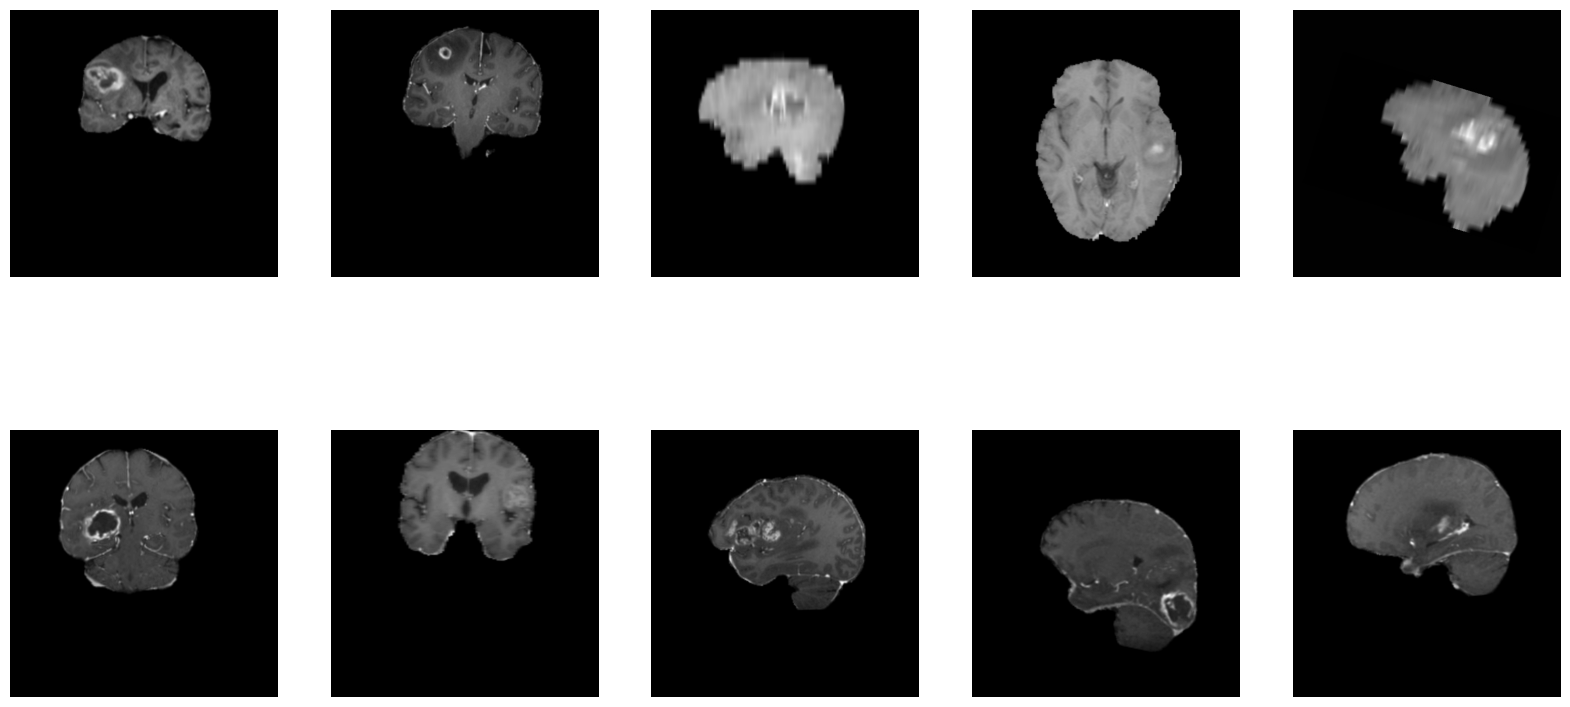

In [ ]:
plt.figure(figsize=(20,10))
for i, c in enumerate(np.random.randint(0, len(train_images), size=10), start=1):
    plt.subplot(2,5,i)
    im = plt.imread(train_path+'/images/'+train_images[c])
    plt.axis('off')
    plt.imshow(im, cmap='gray')

# Train
## 50 epochs, batch 16

In [ ]:
! python ./yolov7/train.py --weights yolov7.pt --cfg ./yolov7/cfg/training/yolov7.yaml --data ./yolov7/data/coco.yaml \
    --batch-size 16 --epochs 50 --img-size 640 640 --hyp ./yolov7/data/hyp.scratch.custom.yaml --name run

2024-03-30 03:37:30.608748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 03:37:30.608874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 03:37:30.791029: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
train: Scanning 'yolov7/dataset/t

In [ ]:
! ls ./runs/train/run

F1_curve.png					   test_batch2_labels.jpg
PR_curve.png					   test_batch2_pred.jpg
P_curve.png					   train_batch0.jpg
R_curve.png					   train_batch1.jpg
confusion_matrix.png				   train_batch2.jpg
events.out.tfevents.1711769866.5e2e698f529b.106.0  train_batch3.jpg
hyp.yaml					   train_batch4.jpg
opt.yaml					   train_batch5.jpg
results.png					   train_batch6.jpg
results.txt					   train_batch7.jpg
test_batch0_labels.jpg				   train_batch8.jpg
test_batch0_pred.jpg				   train_batch9.jpg
test_batch1_labels.jpg				   weights
test_batch1_pred.jpg


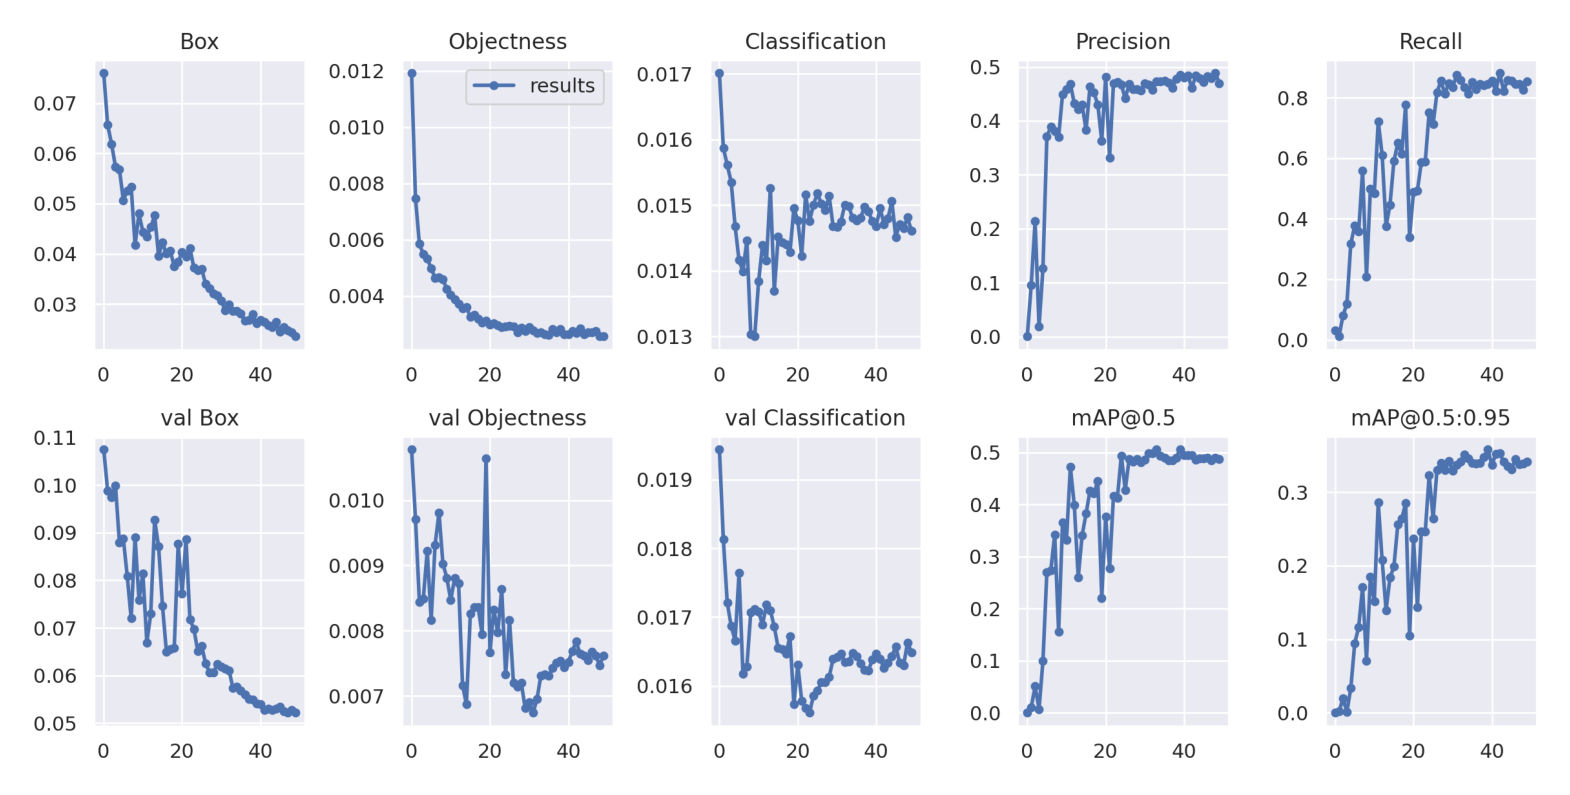

In [ ]:
img = plt.imread('./runs/train/run/results.png')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

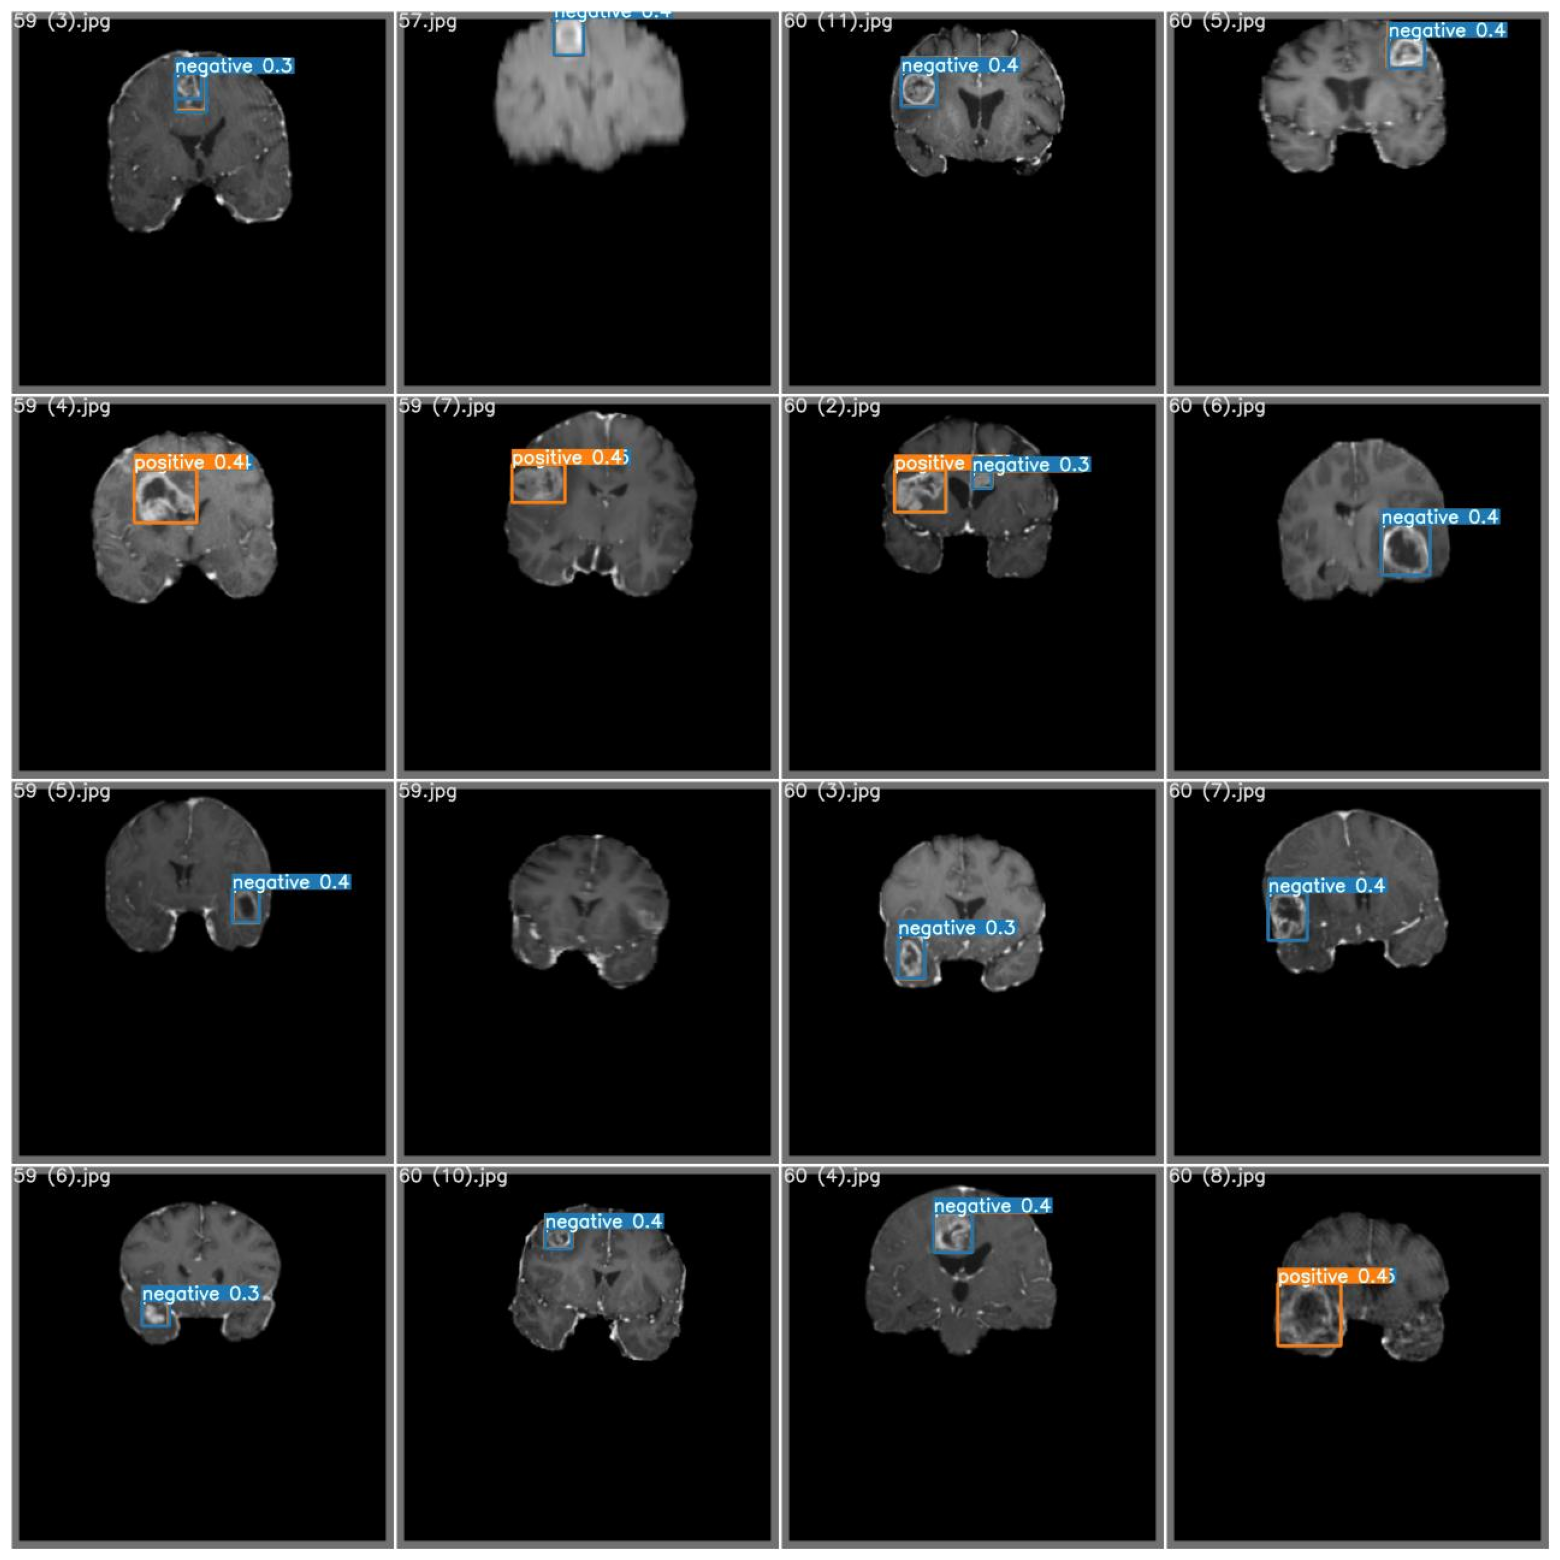

In [ ]:
img = plt.imread('./runs/train/run/test_batch2_pred.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
! python ./yolov7/detect.py  --weights ./runs/train/run/weights/best.pt --conf 0.5 --img-size 640 --source /kaggle/input/detect/main-qimg-3cd4287f29cd7fdc7f68ab223107bb64-pjlq.jpg --no-trace

Namespace(weights=['./runs/train/run/weights/best.pt'], source='/kaggle/input/detect/main-qimg-3cd4287f29cd7fdc7f68ab223107bb64-pjlq.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 positive, Done. (21.3ms) Inference, (516.7ms) NMS
 The image with the result is saved in: runs/detect/exp10/main-qimg-3cd4287f29cd7fdc7f68ab223107bb64-pjlq.jpg
Done. (0.

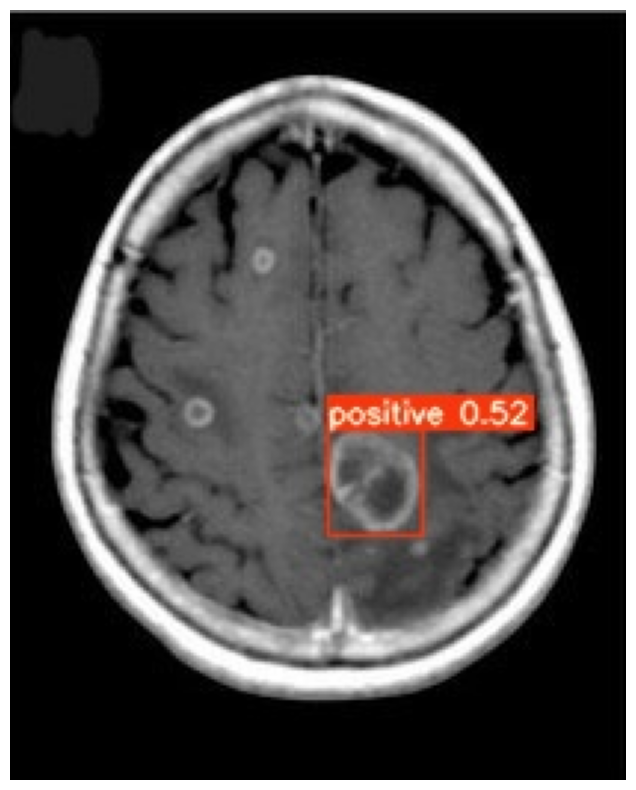

In [ ]:
plt.figure(figsize=(10,10))
im = plt.imread('runs/detect/exp9/d8098866119d81f9e87d2f27b286f9_big_gallery_big_gallery.jpeg')
plt.axis('off')
plt.imshow(im)

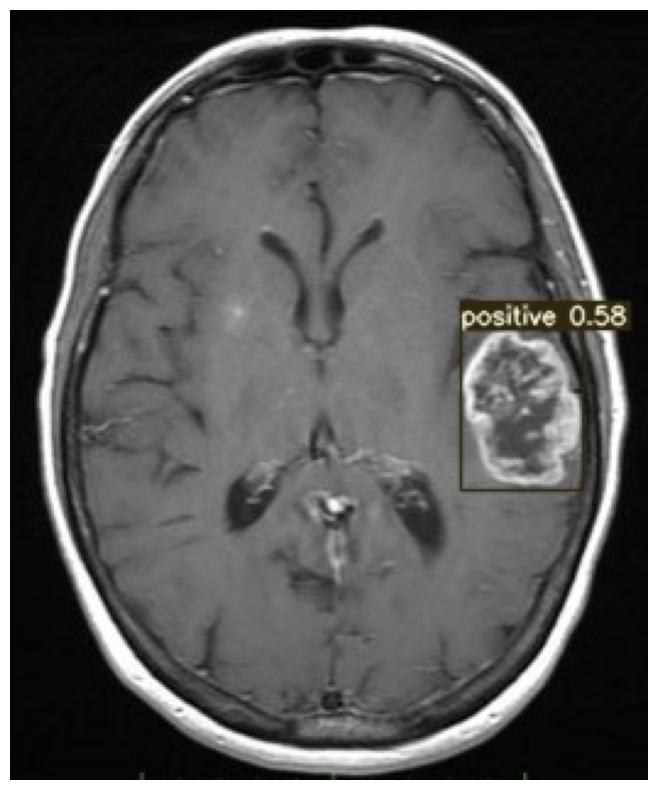

In [ ]:
plt.figure(figsize=(10,10))
im = plt.imread('runs/detect/exp10/main-qimg-3cd4287f29cd7fdc7f68ab223107bb64-pjlq.jpg')
plt.axis('off')
plt.imshow(im)

# Đánh Giá
Sau khi train với mô hình yolov7 qua 50 epochs

- Precision (P): 47% - Đây là tỷ lệ của các bounding box được dự đoán đúng so với tổng số bounding box được dự đoán. Tính chính xác này không cao, có thể gây ra nhiều dự đoán sai.

- Recall (R): 85.3% - Đây là tỷ lệ của các bounding box được dự đoán đúng so với tổng số bounding box thực sự trong tập dữ liệu. Tính phủ sóng này cao, cho thấy mô hình có khả năng tìm ra hầu hết các đối tượng.

- mean Average Precision (mAP): 48.7% - Đây là một phép đo tổng hợp của độ chính xác và độ phủ sóng của mô hình. Một mAP cao cho thấy mô hình có khả năng dự đoán chính xác và bao phủ đối tượng tốt.

# Hạn chế
- Số lượng dữ liệu không nhiều và đa dạng.

- số lần đào tạo còn ít chỉ mới 50 epochs, thời gian đào tạo khá lâu.

# Kết luận
Mặc dù chỉ mới đào tạo qua 50 epochs và có dữ liệu huấn luyện không nhiều, mô hình YOLOv7 vẫn cho thấy kết quả khả quan. Tuy nhiên, để đạt được kết quả tốt hơn, khuyến nghị cần tiếp tục huấn luyện thêm trên một tập dữ liệu lớn hơn và đa dạng hơn, cũng như điều chỉnh các siêu tham số. Điều này sẽ giúp mô hình học được các đặc điểm phức tạp hơn và cải thiện khả năng phát hiện đối tượng.

Nếu có nhu cầu sử dụng mô hình trong các tình huống thời gian thực và đòi hỏi sự nhanh nhạy, hoặc khi cần độ chính xác cao, mô hình YOLOv7 có thể được khuyến nghị sử dụng, với điều kiện đã được huấn luyện và điều chỉnh tối ưu.